In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

stores=pd.read_csv('stores.csv')
features=pd.read_csv('features.csv')
train=pd.read_csv('train.csv')
train = train.merge(stores, how='left').merge(features, how='left')
num=pd.DataFrame()
cat=pd.DataFrame()
train.head()
# abc=pd.DataFrame()
# abc=train


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [2]:
# Create correlation matrix
corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

[]


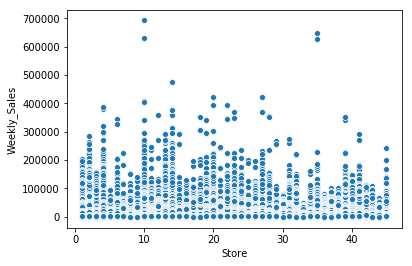

In [3]:
cat['Store']=train['Store']

sns.scatterplot(train['Store'],train['Weekly_Sales'])


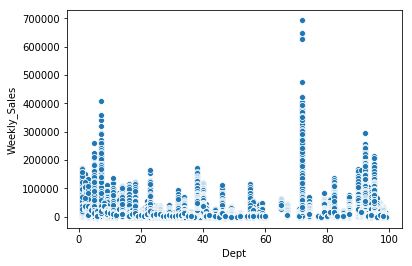

In [4]:
cat['Dept']=train['Dept']
cat['Dept'].isnull().sum()
cat['Dept'].unique()
sns.scatterplot(train['Dept'],train['Weekly_Sales'])


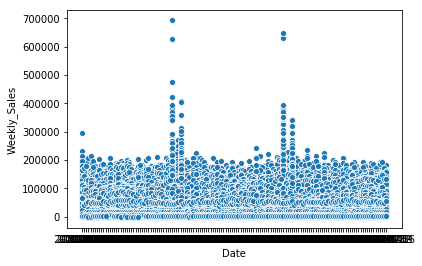

In [5]:
num['Date']=train['Date']
num['Date'].isnull().sum()
sns.scatterplot(train['Date'],train['Weekly_Sales'])


In [6]:
num['Weekly_Sales']=train['Weekly_Sales']
num['Weekly_Sales'].isnull().sum()

0

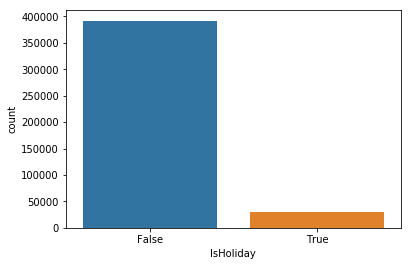

In [7]:
cat['IsHoliday']=train['IsHoliday']
cat['IsHoliday'].isnull().sum()
sns.countplot(cat['IsHoliday'])

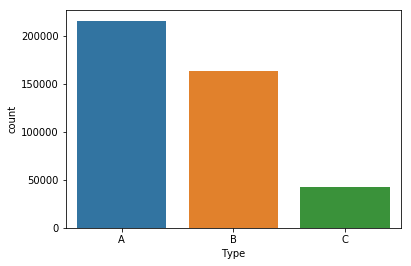

In [8]:
cat['Type']=train['Type']
cat['Type'].isnull().sum()
sns.countplot(cat['Type'])

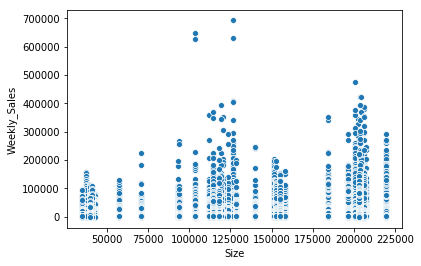

In [9]:
# sns.countplot(train['Size'])
train['Size'].unique()
cat['Size']=train['Size']
sns.scatterplot(cat['Size'],num['Weekly_Sales'])

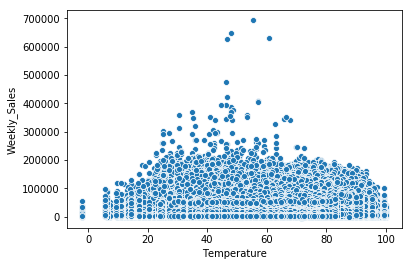

In [10]:
cat['Temperature']=train['Temperature']
train['Temperature'].value_counts()
num.head()
sns.scatterplot(train['Temperature'],train['Weekly_Sales'])

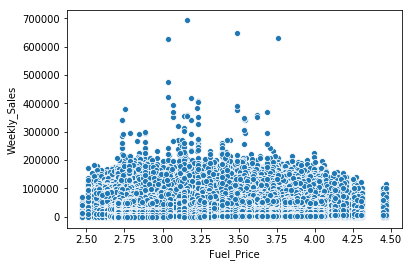

In [11]:
train['Fuel_Price'].value_counts()
cat['Fuel_Price']=train['Fuel_Price']
sns.scatterplot(cat['Fuel_Price'],num['Weekly_Sales'])

0

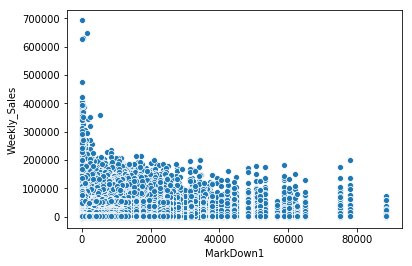

In [12]:
cat['MarkDown1']=train['MarkDown1']
cat['MarkDown1'].fillna(value=0,inplace=True)
sns.scatterplot(cat['MarkDown1'],num['Weekly_Sales'])
cat.head()
cat['MarkDown1'].isnull().sum()

0

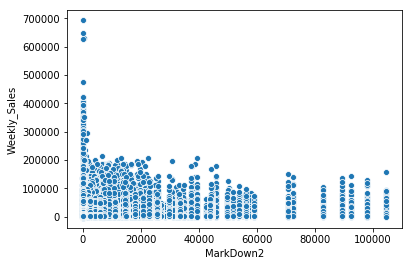

In [13]:
cat['MarkDown2']=train['MarkDown2']
cat['MarkDown2'].fillna(value=0,inplace=True)
sns.scatterplot(cat['MarkDown2'],num['Weekly_Sales'])

cat['MarkDown2'].isnull().sum()

0

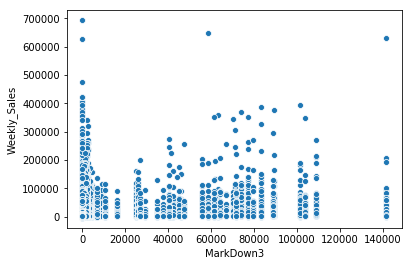

In [15]:
cat['MarkDown3']=train['MarkDown3']
cat['MarkDown3'].fillna(value=0,inplace=True)
sns.scatterplot(cat['MarkDown3'],num['Weekly_Sales'])

cat['MarkDown3'].isnull().sum()

0

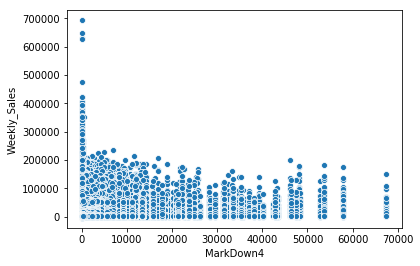

In [16]:
cat['MarkDown4']=train['MarkDown4']
cat['MarkDown4'].fillna(value=0,inplace=True)
sns.scatterplot(cat['MarkDown4'],num['Weekly_Sales'])

cat['MarkDown4'].isnull().sum()

0

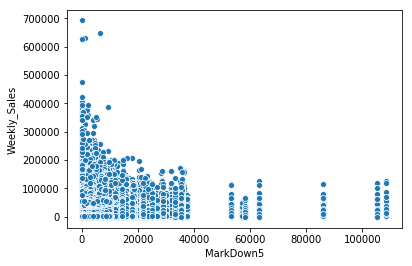

In [17]:
cat['MarkDown5']=train['MarkDown5']
cat['MarkDown5'].fillna(value=0,inplace=True)
sns.scatterplot(cat['MarkDown5'],num['Weekly_Sales'])

cat['MarkDown5'].isnull().sum()

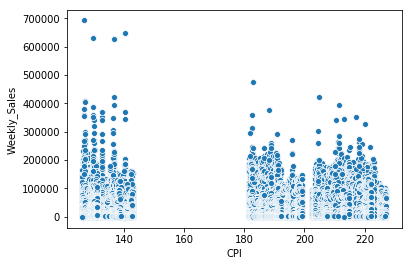

In [18]:
# train['CPI'].unique()
cat['CPI']=train['CPI']
sns.scatterplot(cat['CPI'],num['Weekly_Sales'])


In [69]:
train['Unemployment'].isnull().sum()

0

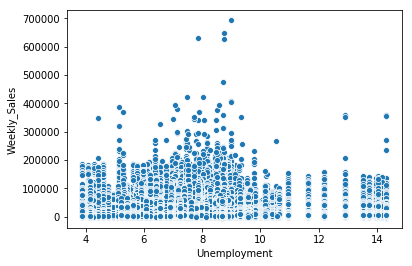

In [19]:
train['Unemployment'].value_counts()
cat['Unemployment']=train['Unemployment']
sns.scatterplot(cat['Unemployment'],num['Weekly_Sales'])


# Feature Engineering

In [22]:
cols =  ['Date']
#cols =  ['deadline']

for col in cols:
    num[col] = pd.to_datetime(num[col])
    
#     dt_num[col] = pd.to_datetime(test[col])


num['year'] = num["Date"].dt.year
num['month'] =num["Date"].dt.month
num['day'] = num["Date"].dt.day
num.head()
num.drop(labels={'Date'},axis=1,inplace=True)

In [23]:
bins=np.linspace(min(train['Store']),max(train['Store']),6)
g={'0-10','10-20','20-30','30-40','40-50'}
cat['Storesbin']=pd.cut(cat['Store'],bins,labels=g,include_lowest=True)

# cat['Storesbin'] = cat['Storesbin'].replace(['0-10','Sel], 'Pri')
# dt_cat["workclass"] = dt_cat["workclass"].replace(['Local-gov','State-gov','Federal-gov'], 'Govt')
# dt_cat["workclass"] = dt_cat["workclass"].replace(['Other','Without-pay','Never-worked'], 'Oth')

cat['Storesbin'] = cat['Storesbin'].map({"0-10":0, "10-20":1, "20-30":2,"30-40":3,"40-50":4})
store_one_hot = pd.get_dummies(cat['Storesbin'],prefix='Store')
store_one_hot.head()
# cat.head()
cat['Storesbin'].value_counts()

0    89793
3    89663
2    87524
4    79529
1    75061
Name: Storesbin, dtype: int64

In [24]:
cat['Dept'].value_counts()
# sns.scatterplot(train['Dept'],train['Weekly_Sales'])
bins=np.linspace(min(train['Dept']),max(train['Dept']),6)
g={'0-20','20-40','40-60','60-80','80-100'}
cat['Deptbin']=pd.cut(cat['Dept'],bins,labels=g,include_lowest=True)
cat['Deptbin'] = cat['Deptbin'].map({"0-20":0, "20-40":1, "40-60":2,"60-80":3,"80-100":4})
dept_one_hot = pd.get_dummies(cat['Deptbin'],prefix='Dept')
dept_one_hot.head()
# train.shape

,Dept_0,Dept_1,Dept_2,Dept_3,Dept_4
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [25]:
cat['IsHoliday'] = np.where(cat['IsHoliday'] == True, 1, 0) 
cat.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Storesbin,Deptbin
0,1,1,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,3
1,1,1,1,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,2,3
2,1,1,0,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,2,3
3,1,1,0,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,2,3
4,1,1,0,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,2,3


In [26]:

cat['Size'].loc[(cat['Size'] >=0) & (cat['Size'] <75000)] = 0

cat['Size'].loc[(cat['Size'] >=75000) & (cat['Size'] <125000)] = 1
cat['Size'].loc[(cat['Size'] >=125000) & (cat['Size'] <175000)] = 2
cat['Size'].loc[(cat['Size'] >=175000) & (cat['Size'] <225000)] = 3



size_one_hot = pd.get_dummies(cat['Size'],prefix='Size')
size_one_hot.head()

F:\Jupiter\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Size_0,Size_1,Size_2,Size_3
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [27]:
size_one_hot['Size_0'].value_counts()

0    329024
1     92546
Name: Size_0, dtype: int64

In [28]:
# sns.scatterplot(train['Temperature'],train['Weekly_Sales'])
bins=np.linspace(min(train['Temperature']),max(train['Temperature']),7)
g={'-20-0','0-20','20-40','40-60','60-80','80-105'}
cat['Temperature']=pd.cut(cat['Temperature'],bins,labels=g,include_lowest=True)
cat['Temperature'] = cat['Temperature'].map({"-20-0":0,"0-20":1, "20-40":2, "40-60":3,"60-80":4,"80-105":5})
temp_one_hot = pd.get_dummies(cat['Temperature'],prefix='Temp')
temp_one_hot.head()

,Temp_0,Temp_1,Temp_2,Temp_3,Temp_4,Temp_5
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [29]:
# (cat['Temperature']>50).value_counts()
# sns.scatterplot(train['Fuel_Price'],train['Weekly_Sales'])
# cat['Temperature'].loc[(cat['Temperature'] >=105)]
bins=np.linspace(min(train['Fuel_Price']),max(train['Fuel_Price']),6)
g={'2.00-2.50','2.50-3.00','3.00-3.50','3.50-4.00','4.00-4.50'}
cat['Fuel_Price']=pd.cut(cat['Fuel_Price'],bins,labels=g,include_lowest=True)
cat['Fuel_Price'] = cat['Fuel_Price'].map({"2.00-2.50":0,"2.50-3.00":1, "3.00-3.50":2, "3.50-4.00":3,"4.00-4.50":4})
fuel_one_hot = pd.get_dummies(cat['Fuel_Price'],prefix='Fuel_Price')
fuel_one_hot.head()

,Fuel_Price_0,Fuel_Price_1,Fuel_Price_2,Fuel_Price_3,Fuel_Price_4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [30]:

# cat['MarkDown1'].value_counts()
# sns.scatterplot(train['MarkDown1'],train['Weekly_Sales'])
bins=np.linspace(min(cat['MarkDown1']),max(cat['MarkDown1']),6)
g={'-10-20000','20000-40000','40000-60000','60000-80000','80000-100000'}
cat['MarkDown1']=pd.cut(cat['MarkDown1'],bins,labels=g,include_lowest=True)
cat['MarkDown1'] = cat['MarkDown1'].map({"-10-20000":0,"20000-40000":1, "40000-60000":2, "60000-80000":3,"80000-100000":4})
mark1_one_hot = pd.get_dummies(cat['MarkDown1'],prefix='MarkDown1')
mark1_one_hot.head()

,MarkDown1_0,MarkDown1_1,MarkDown1_2,MarkDown1_3,MarkDown1_4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [31]:
# sns.scatterplot(train['MarkDown2'],train['Weekly_Sales'])
bins=np.linspace(min(cat['MarkDown2']),max(cat['MarkDown2']),6)
g={'-300-20000','20000-40000','40000-60000','60000-80000','80000-106000'}
cat['MarkDown2']=pd.cut(cat['MarkDown2'],bins,labels=g,include_lowest=True)
cat['MarkDown2'] = cat['MarkDown2'].map({"-300-20000":0,"20000-40000":1, "40000-60000":2, "60000-80000":3,"80000-106000":4})
mark2_one_hot = pd.get_dummies(cat['MarkDown2'],prefix='MarkDown2')
mark2_one_hot.head()

,MarkDown2_0,MarkDown2_1,MarkDown2_2,MarkDown2_3,MarkDown2_4
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [32]:
# sns.scatterplot(cat['MarkDown3'],num['Weekly_Sales'])
ins=np.linspace(min(cat['MarkDown3']),max(cat['MarkDown3']),6)
g={'-30-20000','20000-40000','40000-60000','60000-80000','80000-145000'}
cat['MarkDown3']=pd.cut(cat['MarkDown3'],bins,labels=g,include_lowest=True)
cat['MarkDown3'] = cat['MarkDown3'].map({"-30-20000":0,"20000-40000":1, "40000-60000":2, "60000-80000":3,"80000-145000":4})
mark3_one_hot = pd.get_dummies(cat['MarkDown3'],prefix='MarkDown3')
mark3_one_hot.head()

,MarkDown3_0.0,MarkDown3_1.0,MarkDown3_2.0,MarkDown3_3.0,MarkDown3_4.0
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [33]:
# sns.scatterplot(cat['MarkDown4'],num['Weekly_Sales'])
bins=np.linspace(min(cat['MarkDown4']),max(cat['MarkDown4']),6)
g={'0-10000','10000-20000','20000-30000','30000-40000','40000-70000'}
cat['MarkDown4']=pd.cut(cat['MarkDown4'],bins,labels=g,include_lowest=True)
cat['MarkDown4'] = cat['MarkDown4'].map({"0-10000":0,"10000-20000":1, "20000-30000":2, "30000-40000":3,"40000-70000":4})
mark4_one_hot = pd.get_dummies(cat['MarkDown4'],prefix='MarkDown4')
mark4_one_hot.head()

,MarkDown4_0,MarkDown4_1,MarkDown4_2,MarkDown4_3,MarkDown4_4
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [34]:
# sns.scatterplot(cat['MarkDown4'],num['Weekly_Sales'])
bins=np.linspace(min(cat['MarkDown5']),max(cat['MarkDown5']),6)
g={'0-10000','10000-20000','20000-30000','30000-40000','40000-110000'}
cat['MarkDown5']=pd.cut(cat['MarkDown5'],bins,labels=g,include_lowest=True)
cat['MarkDown5'] = cat['MarkDown5'].map({"0-10000":0,"10000-20000":1, "20000-30000":2, "30000-40000":3,"40000-110000":4})
mark5_one_hot = pd.get_dummies(cat['MarkDown5'],prefix='MarkDown5')
mark5_one_hot.head()

,MarkDown5_0,MarkDown5_1,MarkDown5_2,MarkDown5_3,MarkDown5_4
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [35]:
# sns.scatterplot(cat['MarkDown4'],num['Weekly_Sales'])
bins=np.linspace(min(cat['CPI']),max(cat['CPI']),4)
g={'120-140','140-200','200-300'}
cat['CPI']=pd.cut(cat['CPI'],bins,labels=g,include_lowest=True)
cat['CPI'] = cat['CPI'].map({"120-140":0,"140-200":1,"200-300":2})
cpi_one_hot = pd.get_dummies(cat['CPI'],prefix='CPI')
cpi_one_hot.head()

,CPI_0,CPI_1,CPI_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [36]:
# sns.scatterplot(cat['MarkDown4'],num['Weekly_Sales'])
bins=np.linspace(min(cat['Unemployment']),max(cat['Unemployment']),4)
g={'2-6','6-10','10-15'}
cat['Unemployment']=pd.cut(cat['Unemployment'],bins,labels=g,include_lowest=True)
cat['Unemployment'] = cat['Unemployment'].map({"2-6":0,"6-10":1,"10-15":2})
unemploy_one_hot = pd.get_dummies(cat['Unemployment'],prefix='Unemployment')
unemploy_one_hot.head()

,Unemployment_0,Unemployment_1,Unemployment_2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [37]:
# cat['Unemployment'] = cat['Unemployment'].map({"2-6":0,"6-10":1,"10-15":2})
type_one_hot = pd.get_dummies(cat['Type'],prefix='Type')
type_one_hot.head()

,Type_A,Type_B,Type_C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [43]:
train_onehot = pd.concat([num,
                        store_one_hot, 
                        dept_one_hot,
                        cat['IsHoliday'],
                        temp_one_hot,
                        size_one_hot,
                        fuel_one_hot,
                        mark1_one_hot,
                        mark2_one_hot,
                        mark3_one_hot,
                        mark4_one_hot,
                        mark5_one_hot,
                        cpi_one_hot,
                        type_one_hot,  
                        unemploy_one_hot   
                    

                        ], axis=1)
train_onehot.head()

,Weekly_Sales,year,month,day,Store_0,Store_1,Store_2,Store_3,Store_4,Dept_0,...,MarkDown5_4,CPI_0,CPI_1,CPI_2,Type_A,Type_B,Type_C,Unemployment_0,Unemployment_1,Unemployment_2
0,24924.50,2010,2,5,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
1,46039.49,2010,2,12,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2,41595.55,2010,2,19,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
3,19403.54,2010,2,26,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
4,21827.90,2010,3,5,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [44]:
train_onehot.shape

(421570, 64)

In [153]:

abc=pd.DataFrame()
abc=train_onehot

In [45]:
# Used to drop columns(Very Imp)
# abc.drop[abc['Weekly_Sales'].loc[(abc['Weekly_Sales'] >60000)]]
train_onehot.drop(train_onehot[train_onehot['Weekly_Sales'] >60000 ].index, inplace = True) 

In [46]:
train_onehot['Weekly_Sales'].loc[(train_onehot['Weekly_Sales'] >60000)]

Series([], Name: Weekly_Sales, dtype: float64)

In [47]:
y=train_onehot['Weekly_Sales']
train_onehot.drop(['Weekly_Sales'], axis=1,inplace=True)

# train_onehot.drop(labels={train_onehot['Weekly_Sales']},axis=1,inplace=True)
train_onehot.head()

,year,month,day,Store_0,Store_1,Store_2,Store_3,Store_4,Dept_0,Dept_1,...,MarkDown5_4,CPI_0,CPI_1,CPI_2,Type_A,Type_B,Type_C,Unemployment_0,Unemployment_1,Unemployment_2
0,2010,2,5,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
1,2010,2,12,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2,2010,2,19,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
3,2010,2,26,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
4,2010,3,5,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [51]:
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(train_onehot,y,test_size=0.20)
# X_train=train_onehot
train_onehot.shape
# y_train=y
# y_train.shape

(399510, 63)

In [56]:
from sklearn import model_selection,metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

def ml_fit_algo(algo,X_train,y_train,cv):
    model=algo.fit(X_train,y_train)
    #one pass
    acc=round(model.score(X_train,y_train)*100,2)
    # Cross Validation
    train_pred=model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs=-1)
#     model.fit(X_train,y_train)
#     model.score(X_train,y_train)
    y_pred=model.predict(X_test)
    print ('dt error ',mean_squared_error(y_test, y_pred))
    print('MAE',metrics.mean_absolute_error(y_test, y_pred))
    print('MSE',metrics.mean_squared_error(y_test, y_pred))
    print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R^2 =',metrics.explained_variance_score(y_test, y_pred))
#     print(train_pred)
#     acc_cv=round(model.score(y_train,train_pred)*100,2)
    acc_cv=''    
#     acc,acc_cv
    return train_pred,acc,acc_cv

In [77]:
train_pred_lr, acc_lr, acc_cv_lr = ml_fit_algo(LinearRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
#log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_lr)
# print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))
print("Accuracy CV 10-Fold: %s" % acc_cv_lr)
# print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))
# print('MAE',metrics.mean_absolute_error(y_test, y_pred_rforest))
# print('MSE',metrics.mean_squared_error(y_test, y_pred_rforest))
# print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rforest)))
# print('R^2 =',metrics.explained_variance_score(y_test,y_pred_rforest))

dt error  154168096.2089401
MAE 9133.176650100926
MSE 154168096.2089401
RMSE 12416.44458808318
R^2 = 0.15867962536821656
Accuracy: 16.01
Accuracy CV 10-Fold: 


In [81]:
train_pred_dt, acc_dt, acc_cv_dt = ml_fit_algo(DecisionTreeRegressor(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
print("Accuracy: %s" % acc_dt)
# print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

dt error  164055263.91142324
MAE 9221.304120310602
MSE 164055263.91142324
RMSE 12808.405986360021
R^2 = 0.10473167521618354
Accuracy: 26.77


In [74]:
train_pred_dt, acc_dt, acc_cv_dt = ml_fit_algo(GradientBoostingRegressor(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
print("Accuracy: %s" % acc_dt)
# print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

dt error  142764341.00614244
MAE 8672.359074578144
MSE 142764341.00614244
RMSE 11948.403282704448
R^2 = 0.2217777164758059
Accuracy: 22.16


In [43]:
from sklearn.linear_model import Lasso

# Instantiate object
lasso = Lasso()

# Fit model to training data
lasso = lasso.fit(X_train, y_train)

# Predict
y_pred_lasso = lasso.predict(X_test)

# Score It
from sklearn import metrics
print('Linear Regression Performance')
print('MAE',metrics.mean_absolute_error(y_test, y_pred_lasso))
print('MSE',metrics.mean_squared_error(y_test, y_pred_lasso))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('R^2 =',metrics.explained_variance_score(y_test,y_pred_lasso))

# Lasso Coefficients
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cdf = pd.DataFrame(data = lasso.coef_,index = X_train.columns, columns = ['Lasso Coefficients'])
# **RANDOM FOREST**
cdf.sort_values(by = 'Lasso Coefficients', ascending = False)

Linear Regression Performance
MAE 9192.753927813787
MSE 156256186.49583405
RMSE 12500.247457383955
R^2 = 0.1590211495781375


,Lasso Coefficients
Dept_2,3499.86
Dept_3,2681.23
Size_3,2468.34
MarkDown2_4,2238.89
MarkDown1_4,486.40
Store_1,462.65
MarkDown4_3,448.48
MarkDown4_2,427.20
Store_0,301.49
Type_C,253.13


F:\Jupiter\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[5.74795587e-03 2.15539984e-02 1.54245294e-02 1.56610220e-02
 4.92322200e-03 4.69632315e-03 1.27742148e-02 1.46857611e-02
 2.10963151e-02 2.09038806e-01 1.73892374e-01 1.64748203e-02
 6.80572153e-02 3.40398272e-03 2.05663875e-03 3.04370373e-03
 2.02621892e-03 1.59270963e-03 2.72633927e-04 2.81785037e-03
 1.76678952e-01 2.19754686e-03 2.36487107e-02 8.30931628e-02
 3.92513715e-03 6.41100308e-04 2.27398831e-03 1.68928777e-03
 1.88012371e-03 4.01782169e-04 6.89428637e-06 1.89902551e-05
 3.81353861e-04 6.82686488e-05 1.87085558e-05 3.03839169e-05
 1.35748804e-04 2.69598675e-04 1.44714235e-04 6.54337038e-05
 1.60904911e-05 7.22382661e-05 4.22083099e-04 1.61822259e-04
 7.67134461e-06 1.72143222e-04 2.42880524e-04 6.96628964e-05
 3.23142243e-05 2.96556382e-06 1.15549723e-04 2.26962816e-04
 8.80432442e-06 1.91282674e-06 1.20436788e-03 1.00022516e-02
 6.50427443e-03 2.19588227e-02 4.44727035e-02 8.77347380e-04
 6.19774078e-03 7.73121944e-03 2.68798881e-03]


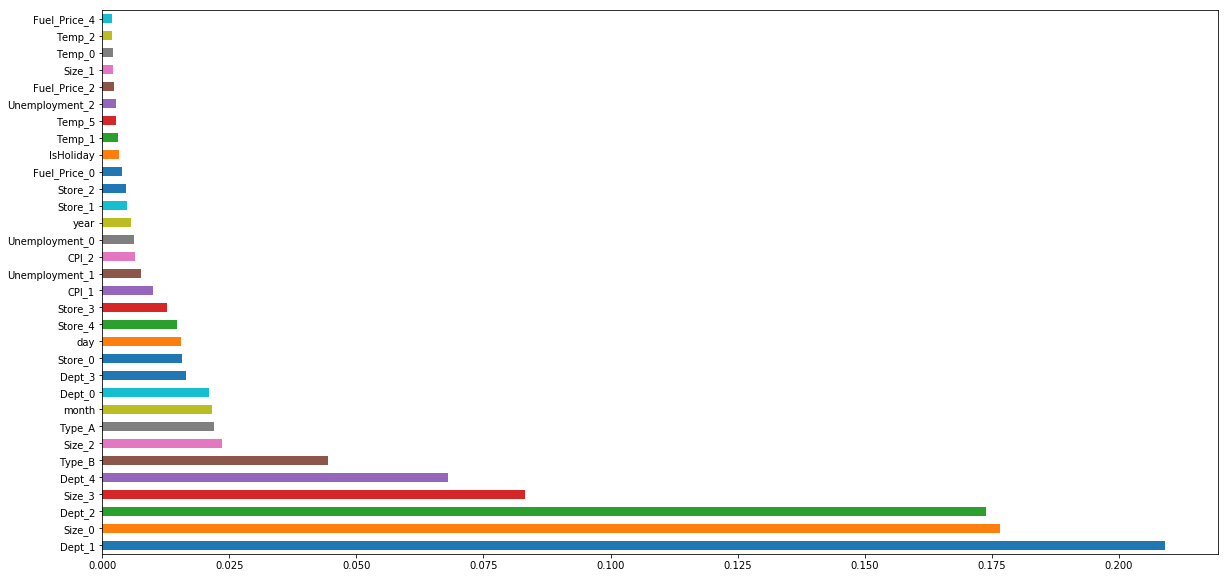

In [52]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
model = ExtraTreesRegressor()
model.fit(train_onehot,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=train_onehot.columns)
feat_importances.nlargest(32).plot(kind='barh')
plt.show()

In [53]:
# feature_select=pd.DataFrame()
feature_select=train_onehot[['Temp_1','Fuel_Price_3','Dept_0','Size_0','Dept_4','Size_3','Dept_1',
                        'Type_B','day','month','Type_A','Dept_2','Size_1','Dept_3','Store_0','Store_1','Store_2','CPI_0',
                       'Size_2','year','Unemployment_0','Unemployment_2','CPI_2','Store_4','Store_3','IsHoliday','Fuel_Price_0',
                       'Temp_5','Temp_3','Fuel_Price_2','Temp_0','Fuel_Price_4']]
# z=y_train
# y.head()


In [58]:

gb=GradientBoostingRegressor(n_estimators=150)
gb.fit(feature_select,y)
# train_pred_dt, acc_dt, acc_cv_dt = ml_fit_algo(GradientBoostingRegressor(), 
#                                                                 X_train, 
#                                                                 y_train,
#       10)
# print("Accuracy: %s" % acc_dt)
# feature_select.shape

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [64]:

test=pd.read_csv('test.csv')
test = test.merge(stores, how='left').merge(features, how='left')
test_col=pd.DataFrame()

test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64

In [65]:
test_col['Fuel_Price']=test['Fuel_Price']
bins=np.linspace(min(test_col['Fuel_Price']),max(test_col['Fuel_Price']),6)
g={'2.00-2.50','2.50-3.00','3.00-3.50','3.50-4.00','4.00-4.50'}
test_col['Fuel_Price']=pd.cut(test_col['Fuel_Price'],bins,labels=g,include_lowest=True)
test_col['Fuel_Price'] = test_col['Fuel_Price'].map({"2.00-2.50":0,"2.50-3.00":1, "3.00-3.50":2, "3.50-4.00":3,"4.00-4.50":4})
test_fuel_one_hot = pd.get_dummies(test_col['Fuel_Price'],prefix='Fuel_Price')
test_fuel_one_hot.head()

,Fuel_Price_0,Fuel_Price_1,Fuel_Price_2,Fuel_Price_3,Fuel_Price_4
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [66]:
test_col['Temperature']=test['Temperature']

bins=np.linspace(min(test_col['Temperature']),max(test_col['Temperature']),7)
g={'-20-0','0-20','20-40','40-60','60-80','80-105'}
test_col['Temperature']=pd.cut(test_col['Temperature'],bins,labels=g,include_lowest=True)
test_col['Temperature'] = test_col['Temperature'].map({"-20-0":0,"0-20":1, "20-40":2, "40-60":3,"60-80":4,"80-105":5})
test_temp_one_hot = pd.get_dummies(test_col['Temperature'],prefix='Temp')
test_temp_one_hot.head()

,Temp_0,Temp_1,Temp_2,Temp_3,Temp_4,Temp_5
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [67]:
test_col['Size']=test['Size']

test_col['Size'].loc[(test_col['Size'] >=0) & (test_col['Size'] <75000)] = 0

test_col['Size'].loc[(test_col['Size'] >=75000) & (test_col['Size'] <125000)] = 1
test_col['Size'].loc[(test_col['Size'] >=125000) & (test_col['Size'] <175000)] = 2
test_col['Size'].loc[(test_col['Size'] >=175000) & (test_col['Size'] <225000)] = 3


# cat['Size'] = cat['Size'].map({"0-0":0, "20-40":1, "40-60":2,"60-80":3,"80-100":4})
# cat['Size'].value_counts()
test_size_one_hot = pd.get_dummies(test_col['Size'],prefix='Size')
test_size_one_hot.head()

,Size_0,Size_1,Size_2,Size_3
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [73]:
test['Unemployment'].fillna((test['Unemployment'].mean()), inplace=True)
test_col['Unemployment']=test['Unemployment']
bins=np.linspace(min(test_col['Unemployment']),max(test_col['Unemployment']),4)
g={'2-6','6-10','10-15'}
test_col['Unemployment']=pd.cut(test_col['Unemployment'],bins,labels=g,include_lowest=True)
test_col['Unemployment'] = test_col['Unemployment'].map({"2-6":0,"6-10":1,"10-15":2})
test_unemploy_one_hot = pd.get_dummies(test_col['Unemployment'],prefix='Unemployment')
test_unemploy_one_hot.head()

,Unemployment_0,Unemployment_1,Unemployment_2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [71]:
test_col['IsHoliday']=test['IsHoliday']
test_col['IsHoliday'] = np.where(test_col['IsHoliday'] == True, 1, 0) 






col['IsHoliday'].head()

0    0
1    0
2    0
3    1
4    0
Name: IsHoliday, dtype: int32

In [72]:
test_col['Store']=test['Store']
bins=np.linspace(min(test_col['Store']),max(test_col['Store']),6)
g={'0-10','10-20','20-30','30-40','40-50'}
test_col['Storesbin']=pd.cut(test_col['Store'],bins,labels=g,include_lowest=True)

# cat['Storesbin'] = cat['Storesbin'].replace(['0-10','Sel], 'Pri')
# dt_cat["workclass"] = dt_cat["workclass"].replace(['Local-gov','State-gov','Federal-gov'], 'Govt')
# dt_cat["workclass"] = dt_cat["workclass"].replace(['Other','Without-pay','Never-worked'], 'Oth')

test_col['Storesbin'] = test_col['Storesbin'].map({"0-10":0, "10-20":1, "20-30":2,"30-40":3,"40-50":4})
test_store_one_hot = pd.get_dummies(test_col['Storesbin'],prefix='Store')
test_store_one_hot.head()
# cat.head()
test_col['Storesbin'].value_counts()

0    24479
3    24395
2    23894
4    21577
1    20719
Name: Storesbin, dtype: int64

In [75]:
test_col['Date']=test['Date']
# 
cols =  ['Date']
#cols =  ['deadline']

for col in cols:
    test_col[col] = pd.to_datetime(test_col[col])
    
#     dt_num[col] = pd.to_datetime(test[col])


test_col['year'] = test_col["Date"].dt.year
test_col['month'] =test_col["Date"].dt.month
test_col['day'] = test_col["Date"].dt.day
test_col.drop(labels={'Date'},axis=1,inplace=True)
test_col.head()


,Fuel_Price,Temperature,Size,Unemployment,IsHoliday,Store,Storesbin,year,month,day
0,4,5,2,0,0,1,2,2012,11,2
1,2,5,2,0,0,1,2,2012,11,9
2,2,5,2,0,0,1,2,2012,11,16
3,2,5,2,0,1,1,2,2012,11,23
4,2,5,2,0,0,1,2,2012,11,30


In [76]:
test['CPI'].fillna((test['CPI'].mean()), inplace=True)
test_col['CPI']=test['CPI']
bins=np.linspace(min(test_col['CPI']),max(test_col['CPI']),4)
g={'120-140','140-200','200-300'}
test_col['CPI']=pd.cut(test_col['CPI'],bins,labels=g,include_lowest=True)
test_col['CPI'] = test_col['CPI'].map({"120-140":0,"140-200":1,"200-300":2})
test_cpi_one_hot = pd.get_dummies(test_col['CPI'],prefix='CPI')
test_cpi_one_hot.head()

,CPI_0,CPI_1,CPI_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [77]:
test_col['Dept']=test['Dept']
test_col['Dept'].value_counts()
# sns.scatterplot(train['Dept'],train['Weekly_Sales'])
bins=np.linspace(min(test_col['Dept']),max(test_col['Dept']),6)
g={'0-20','20-40','40-60','60-80','80-100'}
test_col['Deptbin']=pd.cut(test_col['Dept'],bins,labels=g,include_lowest=True)
test_col['Deptbin'] = test_col['Deptbin'].map({"0-20":0, "20-40":1, "40-60":2,"60-80":3,"80-100":4})
test_dept_one_hot = pd.get_dummies(test_col['Deptbin'],prefix='Dept')
test_dept_one_hot.head()

,Dept_0,Dept_1,Dept_2,Dept_3,Dept_4
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [79]:
test_col['Type']=test['Type']

test_type_one_hot = pd.get_dummies(test_col['Type'],prefix='Type')
test_type_one_hot.head()

,Type_A,Type_B,Type_C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [80]:
test_onehot = pd.concat([test_dept_one_hot,
                         test_store_one_hot,
                         test_col['IsHoliday'],
                         test_col['year'],
                         test_col['month'],
                         test_col['day'],
                         test_fuel_one_hot,
                         test_temp_one_hot,
                         test_size_one_hot,
                         test_unemploy_one_hot,
                         test_cpi_one_hot,
                         test_type_one_hot
                         ], axis=1)
test_onehot.shape

(115064, 38)

In [81]:
feature_select_test=test_onehot[['Temp_1','Fuel_Price_3','Dept_0','Size_0','Dept_4','Size_3','Dept_1',
                        'Type_B','day','month','Type_A','Dept_2','Size_1','Dept_3','Store_0','Store_1','Store_2','CPI_0',
                       'Size_2','year','Unemployment_0','Unemployment_2','CPI_2','Store_4','Store_3','IsHoliday','Fuel_Price_0',
                       'Temp_5','Temp_3','Fuel_Price_2','Temp_0','Fuel_Price_4']]

In [83]:
feature_select_test.shape

(115064, 32)

In [89]:
from sklearn.linear_model import Lasso

lasso = Lasso()

# Fit model to training data
lasso = lasso.fit(X_train, y_train)

# Predict
y_pred_lasso = lasso.predict(X_test)

# Score It
from sklearn import metrics
print('Linear Regression Performance')
print('MAE',metrics.mean_absolute_error(y_test, y_pred_lasso))
print('MSE',metrics.mean_squared_error(y_test, y_pred_lasso))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('R^2 =',metrics.explained_variance_score(y_test,y_pred_lasso))


Linear Regression Performance
MAE 9142.644364616526
MSE 154252638.08577862
RMSE 12419.84855325453
R^2 = 0.15602154252192502


In [94]:
train_pred_dt, acc_dt, acc_cv_dt = ml_fit_algo(GradientBoostingRegressor(n_estimators=150), 
                                                                X_train, 
                                                                y_train,
                                                                10)
print("Accuracy: %s" % acc_dt)

dt error  142211829.36982763
MAE 8649.451171012977
MSE 142211829.36982763
RMSE 11925.260138455162
R^2 = 0.22803905948123093
Accuracy: 22.73


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [105]:
cols =  ['Date']
#cols =  ['deadline']

for col in cols:
    test_col[col] = pd.to_datetime(test_col[col])
    
#     dt_num[col] = pd.to_datetime(test[col])


test_col['year'] = test_col["Date"].dt.year
test_col['month'] =test_col["Date"].dt.month
test_col['day'] = test_col["Date"].dt.day
test_col.drop(labels={'Date'},axis=1,inplace=True)
test_col.head()


,Dept,Store,IsHoliday,year,month,day
0,1,1,False,2012,11,2
1,1,1,False,2012,11,9
2,1,1,False,2012,11,16
3,1,1,True,2012,11,23
4,1,1,False,2012,11,30


In [106]:
bins=np.linspace(min(test_col['Store']),max(test_col['Store']),6)
g={'0-10','10-20','20-30','30-40','40-50'}
test_col['Storesbin']=pd.cut(test_col['Store'],bins,labels=g,include_lowest=True)

# cat['Storesbin'] = cat['Storesbin'].replace(['0-10','Sel], 'Pri')
# dt_cat["workclass"] = dt_cat["workclass"].replace(['Local-gov','State-gov','Federal-gov'], 'Govt')
# dt_cat["workclass"] = dt_cat["workclass"].replace(['Other','Without-pay','Never-worked'], 'Oth')

test_col['Storesbin'] = test_col['Storesbin'].map({"0-10":0, "10-20":1, "20-30":2,"30-40":3,"40-50":4})
test_store_one_hot = pd.get_dummies(test_col['Storesbin'],prefix='Store')
test_store_one_hot.head()
# cat.head()
test_col['Storesbin'].value_counts()

0    24479
1    24395
4    23894
2    21577
3    20719
Name: Storesbin, dtype: int64

In [107]:
test_col['Dept'].value_counts()
# sns.scatterplot(train['Dept'],train['Weekly_Sales'])
bins=np.linspace(min(test_col['Dept']),max(test_col['Dept']),6)
g={'0-20','20-40','40-60','60-80','80-100'}
test_col['Deptbin']=pd.cut(test_col['Dept'],bins,labels=g,include_lowest=True)
test_col['Deptbin'] = test_col['Deptbin'].map({"0-20":0, "20-40":1, "40-60":2,"60-80":3,"80-100":4})
test_dept_one_hot = pd.get_dummies(test_col['Deptbin'],prefix='Dept')
test_dept_one_hot.head()
# train.shape

,Dept_0,Dept_1,Dept_2,Dept_3,Dept_4
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [108]:
test_col['IsHoliday'] = np.where(test_col['IsHoliday'] == True, 1, 0) 
test_col.head()

,Dept,Store,IsHoliday,year,month,day,Storesbin,Deptbin
0,1,1,0,2012,11,2,4,3
1,1,1,0,2012,11,9,4,3
2,1,1,0,2012,11,16,4,3
3,1,1,1,2012,11,23,4,3
4,1,1,0,2012,11,30,4,3


In [183]:
test_onehot = pd.concat([test_dept_one_hot,
                         test_store_one_hot,
                         test_col['IsHoliday'],
                         test_col['year'],
                         test_col['month'],
                         test_col['day'],
                         ], axis=1)
test_onehot.shape

(115064, 14)

In [84]:
predictions=gb.predict(feature_select_test)
predictions

array([18301.90362474, 18242.8834246 , 18180.30848576, ...,
       11839.18395517, 11719.24803208, 11719.24803208])

In [85]:
dataset_test=pd.DataFrame()
dataset_test['Id'] = test['Store'].astype(str) + '_' +  test['Dept'].astype(str) + '_' +  test['Date'].astype(str)
dataset_test['Weekly_Sales']=predictions
dataset_test.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,18301.903625
1,1_1_2012-11-09,18242.883425
2,1_1_2012-11-16,18180.308486
3,1_1_2012-11-23,19327.134100
4,1_1_2012-11-30,18101.185125


In [86]:
dataset_test.to_csv('submit.csv', index=False)

In [87]:
data=pd.read_csv('submit.csv')
data.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,18301.903625
1,1_1_2012-11-09,18242.883425
2,1_1_2012-11-16,18180.308486
3,1_1_2012-11-23,19327.134100
4,1_1_2012-11-30,18101.185125
